<a href="https://colab.research.google.com/github/Pratishrutiksah/Taxi-out-time-prediction/blob/main/flight_taxi_out3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

pd.set_option('display.expand_frame_repr',
              False)  # to show all the columns in the console
sns.set(style="white")



In [ ]:
# infos about the dataset: https://www.kaggle.com/deepankurk/flight-take-off-data-jfk-airport
df = pd.read_csv('/content/M1_final.csv')
print(df.head())
print(df.shape)
print(df.columns)

   MONTH  DAY_OF_MONTH  DAY_OF_WEEK OP_UNIQUE_CARRIER TAIL_NUM DEST  DEP_DELAY  CRS_ELAPSED_TIME  DISTANCE  CRS_DEP_M  ...  Dew Point  Humidity  Wind Wind Speed  Wind Gust Pressure     Condition  sch_dep  sch_arr TAXI_OUT
0     11             1            5                B6   N828JB  CHS         -1               124       636        324  ...         34        58     W         25         38    29.86  Fair / Windy        9       17       14
1     11             1            5                B6   N992JB  LAX         -7               371      2475        340  ...         34        58     W         25         38    29.86  Fair / Windy        9       17       15
2     11             1            5                B6   N959JB  FLL         40               181      1069        301  ...         34        58     W         25         38    29.86  Fair / Windy        9       17       22
3     11             1            5                B6   N999JQ  MCO         -2               168       944      

In [ ]:
print(df.info())  # I notice that the column "Wind" has 2 null samples
df.isnull().sum()  # double-check if some values is null
print('Wind missing values --> ', np.round(df['Wind'].isnull().mean(), 4), '%')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28820 entries, 0 to 28819
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MONTH              28820 non-null  int64  
 1   DAY_OF_MONTH       28820 non-null  int64  
 2   DAY_OF_WEEK        28820 non-null  int64  
 3   OP_UNIQUE_CARRIER  28820 non-null  object 
 4   TAIL_NUM           28820 non-null  object 
 5   DEST               28820 non-null  object 
 6   DEP_DELAY          28820 non-null  int64  
 7   CRS_ELAPSED_TIME   28820 non-null  int64  
 8   DISTANCE           28820 non-null  int64  
 9   CRS_DEP_M          28820 non-null  int64  
 10  DEP_TIME_M         28820 non-null  int64  
 11  CRS_ARR_M          28820 non-null  int64  
 12  Temperature        28820 non-null  int64  
 13  Dew Point          28820 non-null  object 
 14  Humidity           28820 non-null  int64  
 15  Wind               28818 non-null  object 
 16  Wind Speed         288

In [ ]:
# I see that missing values are just 0.0001% so i decide to remove that instances
df.dropna(axis=0, inplace=True)


In [ ]:
print(df['TAXI_OUT'].mean())
print(df['TAXI_OUT'].value_counts())

20.857207300992435
TAXI_OUT
16    2008
17    1978
15    1911
18    1893
19    1748
20    1676
14    1626
21    1505
13    1354
22    1352
23    1204
24    1109
25     916
12     911
26     875
27     808
28     695
29     620
11     581
30     497
31     495
32     400
33     378
34     347
35     317
10     302
36     270
37     216
39     182
38     182
40     175
41     153
9       91
8       28
7       13
5        1
6        1
Name: count, dtype: int64


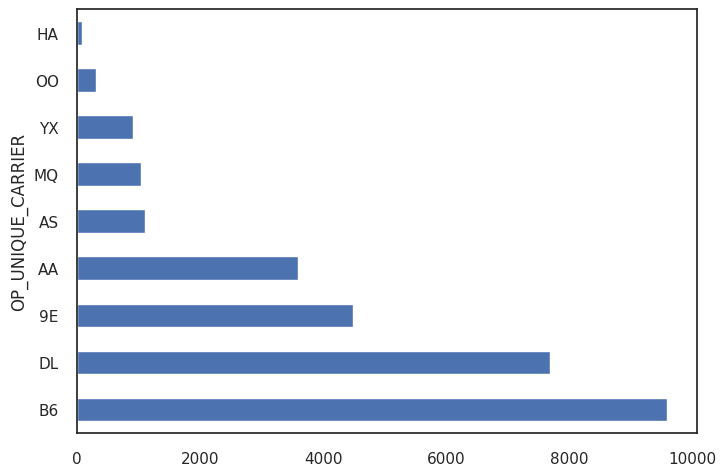

In [ ]:
airlines = df['OP_UNIQUE_CARRIER'].unique()
len(airlines)
tail = df['TAIL_NUM'].unique()
len(tail)
counts = df['OP_UNIQUE_CARRIER'].value_counts()
counts.plot(kind='barh')
plt.show()
# VEDO CHE IL NUMERO DI FLIGHTS CHE ABBIAMO NON è BILANCIATISSIMO RISPETTO A QUALI COMPAGNIE CONSIDERIAMO

In [ ]:
df.drop('TAIL_NUM',
        axis=1,
        inplace=True)
df.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,DEST,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,DEP_TIME_M,...,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,sch_dep,sch_arr,TAXI_OUT
0,11,1,5,B6,CHS,-1,124,636,324,323,...,34,58,W,25,38,29.86,Fair / Windy,9,17,14
1,11,1,5,B6,LAX,-7,371,2475,340,333,...,34,58,W,25,38,29.86,Fair / Windy,9,17,15
2,11,1,5,B6,FLL,40,181,1069,301,341,...,34,58,W,25,38,29.86,Fair / Windy,9,17,22
3,11,1,5,B6,MCO,-2,168,944,345,343,...,34,58,W,25,38,29.86,Fair / Windy,9,17,12
4,11,1,5,DL,ATL,-4,139,760,360,356,...,32,58,W,24,35,29.91,Fair / Windy,9,17,13


In [ ]:
df['YEAR'] = np.where(df['MONTH'] == 1,
                      2020,
                      2019)

In [ ]:
#df['date'] = pd.to_datetime(df.YEAR * 10000 + df.MONTH * 100 + df.DAY_OF_MONTH,
#                            format='%Y%m%d')

In [ ]:
df.drop('YEAR',
        axis=1,
        inplace=True)

In [ ]:
y = df[['date', 'TAXI_OUT']].groupby('date').mean()
x = df.date.unique()

KeyError: "['date'] not in index"

In [ ]:
df['Dew Point'] = df['Dew Point'].str.strip()
df['Dew Point'] = df['Dew Point'].astype(int)
df.info()
print(df.dtypes)

<class 'pandas.core.frame.DataFrame'>
Index: 28818 entries, 0 to 28819
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MONTH              28818 non-null  int64  
 1   DAY_OF_MONTH       28818 non-null  int64  
 2   DAY_OF_WEEK        28818 non-null  int64  
 3   OP_UNIQUE_CARRIER  28818 non-null  object 
 4   DEST               28818 non-null  object 
 5   DEP_DELAY          28818 non-null  int64  
 6   CRS_ELAPSED_TIME   28818 non-null  int64  
 7   DISTANCE           28818 non-null  int64  
 8   CRS_DEP_M          28818 non-null  int64  
 9   DEP_TIME_M         28818 non-null  int64  
 10  CRS_ARR_M          28818 non-null  int64  
 11  Temperature        28818 non-null  int64  
 12  Dew Point          28818 non-null  int64  
 13  Humidity           28818 non-null  int64  
 14  Wind               28818 non-null  object 
 15  Wind Speed         28818 non-null  int64  
 16  Wind Gust          28818 no

In [ ]:
# label encoder per trasformare features categoriche (stringhe) in int
labeled_df = df.copy()
label_encoder = LabelEncoder()
categorical = (labeled_df.dtypes == 'object')
categorical_labels = list(categorical[categorical].index)
del categorical_labels[2:6]
print(categorical_labels)
for column in categorical_labels:
    labeled_df[column] = label_encoder.fit_transform(df[column])
labeled_df.head()

['OP_UNIQUE_CARRIER', 'DEST']


,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,DEST,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,DEP_TIME_M,...,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,sch_dep,sch_arr,TAXI_OUT
0,11,1,5,3,10,-1,124,636,324,323,...,34,58,W,25,38,29.86,Fair / Windy,9,17,14
1,11,1,5,3,28,-7,371,2475,340,333,...,34,58,W,25,38,29.86,Fair / Windy,9,17,15
2,11,1,5,3,20,40,181,1069,301,341,...,34,58,W,25,38,29.86,Fair / Windy,9,17,22
3,11,1,5,3,30,-2,168,944,345,343,...,34,58,W,25,38,29.86,Fair / Windy,9,17,12
4,11,1,5,4,1,-4,139,760,360,356,...,32,58,W,24,35,29.91,Fair / Windy,9,17,13


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.ensemble import BaggingRegressor
from sklearn import metrics
from yellowbrick.regressor import ResidualsPlot

In [ ]:
random_state = 17
np.random.seed(17)

In [ ]:
df.drop(['DISTANCE'], axis=1,
        inplace=True)

In [ ]:
## ENCODING CATEGORICAL FEATURES WITH LABEL ENCODER

labeled_df = df.copy()
label_encoder = LabelEncoder()
categorical = (labeled_df.dtypes == 'object')
numerical = (labeled_df.dtypes != 'object')
categorical_labels = list(categorical[categorical].index)
numerical_labels = list(numerical[numerical].index)
numerical_labels.remove('TAXI_OUT')
print(categorical_labels)
for column in categorical_labels:
    labeled_df[column] = label_encoder.fit_transform(df[column])

['OP_UNIQUE_CARRIER', 'DEST', 'Wind', 'Condition']


In [ ]:
x = labeled_df['DEP_DELAY'].values.reshape(28818, 1)
np.amin(x)
x = x + np.abs(np.amin(x))
x_logged = np.log(x + 1)

In [ ]:
# LA RE-INSERISCO NEL DATAFRAME
x_logged = x_logged.reshape(28818, )
labeled_df['DEP_DELAY'] = x_logged.tolist()

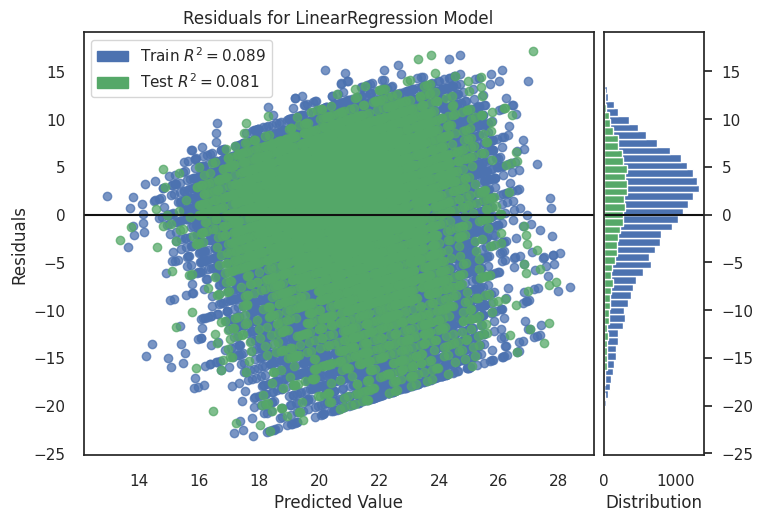

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [ ]:
X = labeled_df.copy()
X.drop('TAXI_OUT', axis=1, inplace=True)
y = labeled_df['TAXI_OUT']
# questo splitting è al 100% provvisorio, solo per tracciare il residual plot
x_tr, x_t, y_tr, y_t = train_test_split(X, y, test_size=0.2, random_state=0)

lr = LinearRegression()
residualPlot = ResidualsPlot(lr)

residualPlot.fit(x_tr, y_tr)
residualPlot.score(x_t, y_t)
residualPlot.show()

In [ ]:
X = labeled_df.copy()
X.drop('TAXI_OUT', axis=1, inplace=True)
y = labeled_df['TAXI_OUT']

X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y, random_state=random_state, test_size=0.2)


In [ ]:
X_train_raw[numerical_labels].info()

<class 'pandas.core.frame.DataFrame'>
Index: 23054 entries, 10784 to 10863
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MONTH             23054 non-null  int64  
 1   DAY_OF_MONTH      23054 non-null  int64  
 2   DAY_OF_WEEK       23054 non-null  int64  
 3   DEP_DELAY         23054 non-null  float64
 4   CRS_ELAPSED_TIME  23054 non-null  int64  
 5   CRS_DEP_M         23054 non-null  int64  
 6   DEP_TIME_M        23054 non-null  int64  
 7   CRS_ARR_M         23054 non-null  int64  
 8   Temperature       23054 non-null  int64  
 9   Dew Point         23054 non-null  int64  
 10  Humidity          23054 non-null  int64  
 11  Wind Speed        23054 non-null  int64  
 12  Wind Gust         23054 non-null  int64  
 13  Pressure          23054 non-null  float64
 14  sch_dep           23054 non-null  int64  
 15  sch_arr           23054 non-null  int64  
dtypes: float64(2), int64(14)
memory usage: 3.

#Modelling

In [ ]:
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y, random_state=random_state, test_size=0.2)

# per la standardizzazione utilizzo lo standard Scaler perchè sulla documentazione di scikit learn
# consiglia di standardizzare con questo se viene utilizzata la Lasso Regression.
stdScal = StandardScaler()
stdScal.fit(X_train_raw[numerical_labels].astype('float64'))
X_train_scaled_num = pd.DataFrame(stdScal.transform(X_train_raw[numerical_labels].astype('float64')),
                                  columns=numerical_labels)
X_test_scaled_num = pd.DataFrame(stdScal.transform(X_test_raw[numerical_labels].astype('float64')),
                                 columns=numerical_labels)

X_train_raw.reset_index(drop=True, inplace=True)
X_test_raw.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

X_train_scaled = pd.concat([X_train_scaled_num, X_train_raw[categorical_labels]], axis=1)
X_test_scaled = pd.concat([X_test_scaled_num, X_test_raw[categorical_labels]], axis=1)

In [ ]:
X_train_scaled.head()

NameError: name 'X_train_scaled' is not defined

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Best parameters from RandomizedSearchCV
best_params_xgb = {
    'learning_rate': 0.1,
    'max_depth': 3,
    'n_estimators': 100,
    'random_state': random_state  # Ensure reproducibility
}

# Initialize and train the XGBoost model with the best parameters
xgb_model = XGBRegressor(**best_params_xgb)
xgb_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = xgb_model.predict(X_test_scaled)

# Calculate R²
r2 = r2_score(y_test, y_pred)
print(f'R² score: {r2}')

xgb_mse = mean_squared_error(y_test, y_pred)
print(f'XGBoost MSE: {xgb_mse}')

# Calculate RMSE and Negative RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
neg_rmse = -rmse
print(f'RMSE: {rmse}')
print(f'Negative RMSE: {neg_rmse}')
print(f'XGBoost MSE: {xgb_mse}')

R² score: 0.19269439716747072
XGBoost MSE: 36.77554232704701
RMSE: 6.064284156192469
Negative RMSE: -6.064284156192469
XGBoost MSE: 36.77554232704701


In [ ]:
# Gradient Boosting Machine (GBM)
gbm_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=random_state)
gbm_model.fit(X_train_scaled, y_train)
gbm_predictions = gbm_model.predict(X_test_scaled)
gbm_mse = mean_squared_error(y_test, gbm_predictions)
print(f'GBM MSE: {gbm_mse}')

GBM MSE: 36.59658221148397


In [ ]:
# Random Forest
rf_model = RandomForestRegressor(n_estimators=100, max_depth=3, random_state=random_state)
rf_model.fit(X_train_scaled, y_train)
rf_predictions = rf_model.predict(X_test_scaled)
rf_mse = mean_squared_error(y_test, rf_predictions)
print(f'Random Forest MSE: {rf_mse}')

Random Forest MSE: 42.370867792376025


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Initialize the KNN model with a specified number of neighbors
knn_model = KNeighborsRegressor(n_neighbors=5)  # You can adjust the number of neighbors

# Train the KNN model on the scaled training data
knn_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
knn_predictions = knn_model.predict(X_test_scaled)

# Calculate MSE
knn_mse = mean_squared_error(y_test, knn_predictions)
print(f'KNN MSE: {knn_mse}')

# Calculate R²
knn_r2 = r2_score(y_test, knn_predictions)
print(f'KNN R²: {knn_r2}')

# Calculate RMSE and Negative RMSE
knn_rmse = np.sqrt(knn_mse)
knn_neg_rmse = -knn_rmse
print(f'KNN RMSE: {knn_rmse}')
print(f'KNN Negative RMSE: {knn_neg_rmse}')

# Print y_test and y_pred
print('y_test:', y_test.values)
print('y_pred:', knn_predictions)


KNN MSE: 44.49965995836225
KNN R²: 0.023132698110971073
KNN RMSE: 6.670806544816171
KNN Negative RMSE: -6.670806544816171
y_test: [18 18 17 ... 17 19 16]
y_pred: [21.4 19.4 21.  ... 21.2 22.2 16.6]


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [ ]:

# Define the model architecture
model = Sequential([
    Dense(128, input_dim=X_train_scaled.shape[1], activation='relu'),
    Dropout(0.2),  # Dropout layer to prevent overfitting
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1)  # Output layer with 1 neuron for regression
])

# Compile the model
model.compile(optimizer=Adam(lr=0.001), loss='mean_squared_error')

# Print a summary of the model
model.summary()

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_test_scaled, y_test), verbose=2)

# Make predictions on the test set
ann_predictions = model.predict(X_test_scaled).flatten()

# Calculate MSE
ann_mse = mean_squared_error(y_test, ann_predictions)
print(f'ANN MSE: {ann_mse}')

# Calculate R²
ann_r2 = r2_score(y_test, ann_predictions)
print(f'ANN R²: {ann_r2}')

# Calculate RMSE and Negative RMSE
ann_rmse = np.sqrt(ann_mse)
ann_neg_rmse = -ann_rmse
print(f'ANN RMSE: {ann_rmse}')
print(f'ANN Negative RMSE: {ann_neg_rmse}')

# Print y_test and y_pred
print('y_test:', y_test.values)
print('y_pred:', ann_predictions)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               2688      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 11009 (43.00 KB)
Trainable params: 11009 (43.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
721/721 -

#Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
from scipy.stats import randint, uniform

# Define the parameter distributions
param_dist_xgb = {
    'n_estimators': randint(100, 300),  # Number of trees
    'learning_rate': uniform(0.01, 0.3),  # Learning rate
    'max_depth': np.arange(2, 11, 1)  # Maximum depth of trees
}

# Initialize the XGBRegressor
xgb_model = XGBRegressor(random_state=random_state)

# Initialize RandomizedSearchCV
random_search_xgb = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_dist_xgb,
                                       n_iter=50, scoring='neg_mean_squared_error', cv=3,
                                       verbose=1, random_state=random_state, n_jobs=-1)

# Fit RandomizedSearchCV
random_search_xgb.fit(X_train_scaled, y_train)

# Best parameters and best score
print("Best parameters for XGBoost:", random_search_xgb.best_params_)
print("Best MSE score for XGBoost:", -random_search_xgb.best_score_)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best parameters for XGBoost: {'learning_rate': 0.08361171713792499, 'max_depth': 7, 'n_estimators': 205}
Best MSE score for XGBoost: 33.24261941954834


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from scipy.stats import randint, uniform

# Define the parameter distributions
param_dist_gbm = {
    'n_estimators': randint(100, 300),  # Number of trees
    "learning_rate": np.linspace(0.01, 0.1, 10),  # Learning rate
    'max_depth': np.arange(2, 11, 1)  # Maximum depth of trees
}

# Initialize the GradientBoostingRegressor
gbm_model = GradientBoostingRegressor(random_state=random_state)

# Initialize RandomizedSearchCV
random_search_gbm = RandomizedSearchCV(estimator=gbm_model, param_distributions=param_dist_gbm,
                                       n_iter=20, scoring='neg_mean_squared_error', cv=3,
                                       verbose=3, random_state=random_state)

# Fit RandomizedSearchCV
random_search_gbm.fit(X_train_scaled, y_train)

# Best parameters and best score
print("Best parameters for GBM:", random_search_gbm.best_params_)
print("Best MSE score for GBM:", -random_search_gbm.best_score_)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV 1/3] END learning_rate=0.020000000000000004, max_depth=8, n_estimators=250;, score=-34.515 total time=  29.7s
[CV 2/3] END learning_rate=0.020000000000000004, max_depth=8, n_estimators=250;, score=-33.796 total time=  29.7s
[CV 3/3] END learning_rate=0.020000000000000004, max_depth=8, n_estimators=250;, score=-34.146 total time=  28.0s
[CV 1/3] END learning_rate=0.1, max_depth=2, n_estimators=273;, score=-38.592 total time=   7.2s
[CV 2/3] END learning_rate=0.1, max_depth=2, n_estimators=273;, score=-37.877 total time=   8.3s
[CV 3/3] END learning_rate=0.1, max_depth=2, n_estimators=273;, score=-38.279 total time=   7.3s
[CV 1/3] END learning_rate=0.07, max_depth=6, n_estimators=139;, score=-34.579 total time=  11.8s
[CV 2/3] END learning_rate=0.07, max_depth=6, n_estimators=139;, score=-34.043 total time=  11.8s
[CV 3/3] END learning_rate=0.07, max_depth=6, n_estimators=139;, score=-34.611 total time=  11.6s
[CV 1/3] END

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import randint

# Define the parameter distributions
param_dist_rf = {
    'n_estimators': randint(100, 300),  # Number of trees
    'max_depth': np.arange(2, 11, 1)  # Maximum depth of trees
}

# Initialize the RandomForestRegressor
rf_model = RandomForestRegressor(random_state=random_state)

# Initialize RandomizedSearchCV
random_search_rf = RandomizedSearchCV(estimator=rf_model, param_distributions=param_dist_rf,
                                      n_iter=20, scoring='neg_mean_squared_error', cv=3,
                                      verbose=3, random_state=random_state)

# Fit RandomizedSearchCV
random_search_rf.fit(X_train_scaled, y_train)

# Best parameters and best score
print("Best parameters for Random Forest:", random_search_rf.best_params_)
print("Best MSE score for Random Forest:", -random_search_rf.best_score_)


Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV 1/3] END ...max_depth=3, n_estimators=243;, score=-44.321 total time=   6.7s
[CV 2/3] END ...max_depth=3, n_estimators=243;, score=-42.903 total time=   7.7s
[CV 3/3] END ...max_depth=3, n_estimators=243;, score=-43.964 total time=   6.7s
[CV 1/3] END ...max_depth=8, n_estimators=250;, score=-38.261 total time=  19.4s
[CV 2/3] END ...max_depth=8, n_estimators=250;, score=-37.344 total time=  18.5s
[CV 3/3] END ...max_depth=8, n_estimators=250;, score=-37.699 total time=  19.2s
[CV 1/3] END ...max_depth=2, n_estimators=273;, score=-45.606 total time=   5.4s
[CV 2/3] END ...max_depth=2, n_estimators=273;, score=-44.175 total time=   5.1s
[CV 3/3] END ...max_depth=2, n_estimators=273;, score=-45.167 total time=   6.2s
[CV 1/3] END ...max_depth=8, n_estimators=131;, score=-38.311 total time=  11.3s
[CV 2/3] END ...max_depth=8, n_estimators=131;, score=-37.447 total time=   9.1s
[CV 3/3] END ...max_depth=8, n_estimators=131;, 

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import make_scorer, mean_squared_error
import numpy as np

# Define the parameter grid
param_dist = {
    'n_neighbors': np.arange(1, 50),                 # Number of neighbors
    'weights': ['uniform', 'distance'],              # Weight function used in prediction
    'metric': ['manhattan', 'minkowski']             # Distance metric to use
}

# Initialize the KNN model
knn_model = KNeighborsRegressor()

# Define the custom scoring function for negative RMSE
def neg_rmse_scorer(estimator, X, y):
    y_pred = estimator.predict(X)
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    return -rmse

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(
    knn_model,
    param_distributions=param_dist,
    n_iter=20,                                                            # Number of parameter settings that are sampled
    scoring={'neg_rmse': make_scorer(neg_rmse_scorer), 'r2': 'r2'},
    refit='neg_rmse',                                                      # Refitting the best estimator using the negative RMSE scoring
    cv=3,                                                                  # 5-fold cross-validation
    random_state=random_state,                                             # Ensure reproducibility
    verbose=2,                                                             # Print detailed information during the fitting process
    n_jobs=-1                                                              # Use all available cores
)

# Fit the RandomizedSearchCV object
random_search.fit(X_train_scaled, y_train)

# Get the best parameters and score
best_params_knn = random_search.best_params_
best_score_knn = random_search.best_score_

print(f'Best parameters for KNN: {best_params_knn}')
print(f'Best negative RMSE score for KNN: {best_score_knn}')

# Train and evaluate the best KNN model
best_knn_model = random_search.best_estimator_
knn_predictions = best_knn_model.predict(X_test_scaled)

# Calculate MSE
knn_mse = mean_squared_error(y_test, knn_predictions)
print(f'KNN MSE: {knn_mse}')

# Calculate R²
knn_r2 = r2_score(y_test, knn_predictions)
print(f'KNN R²: {knn_r2}')

# Calculate RMSE and Negative RMSE
knn_rmse = np.sqrt(knn_mse)
knn_neg_rmse = -knn_rmse
print(f'KNN RMSE: {knn_rmse}')
print(f'KNN Negative RMSE: {knn_neg_rmse}')

# Print y_test and y_pred
print('y_test:', y_test.values)
print('y_pred:', knn_predictions)


Fitting 3 folds for each of 20 candidates, totalling 60 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan]
  warnings.warn(


Best parameters for KNN: {'weights': 'uniform', 'n_neighbors': 1, 'metric': 'manhattan'}
Best negative RMSE score for KNN: nan
KNN MSE: 67.56280360860514
KNN R²: -0.483155011318102
KNN RMSE: 8.219659579849104
KNN Negative RMSE: -8.219659579849104
y_test: [18 18 17 ... 17 19 16]
y_pred: [14. 28. 13. ... 39. 17. 15.]


#Tuned Model

###XG-Boost

In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Best parameters from RandomizedSearchCV
best_params_xgb = {
    'learning_rate': 0.08361171713792499,
    'max_depth': 7,
    'n_estimators': 205,
    'random_state': random_state  # Ensure reproducibility
}

# Initialize and train the XGBoost model with the best parameters
xgb_model = XGBRegressor(**best_params_xgb)
xgb_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = xgb_model.predict(X_test_scaled)

# Calculate R²
r2 = r2_score(y_test, y_pred)
print(f'R² score: {r2}')

# Calculate RMSE and Negative RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
neg_rmse = -rmse
print(f'RMSE: {rmse}')
print(f'Negative RMSE: {neg_rmse}')


R² score: 0.3120066888458719
RMSE: 5.598254884133461
Negative RMSE: -5.598254884133461


### GBM

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Best parameters from RandomizedSearchCV
best_params_gbm = {
    'learning_rate': 0.05000000000000001,
    'max_depth': 9,
    'n_estimators': 229,
    'random_state': random_state  # Ensure reproducibility
}

# Initialize and train the GBM model with the best parameters
gbm_model = GradientBoostingRegressor(**best_params_gbm)
gbm_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = gbm_model.predict(X_test_scaled)

# Calculate R²
r2 = r2_score(y_test, y_pred)
print(f'R² score: {r2}')

# Calculate RMSE and Negative RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
neg_rmse = -rmse
print(f'RMSE: {rmse}')
print(f'Negative RMSE: {neg_rmse}')


R² score: 0.31416275822856987
RMSE: 5.589475948946597
Negative RMSE: -5.589475948946597


### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Best parameters from RandomizedSearchCV
best_params_rf = {
    'max_depth': 10,
    'n_estimators': 279,
    'random_state': random_state  # Ensure reproducibility
}

# Initialize and train the Random Forest model with the best parameters
rf_model = RandomForestRegressor(**best_params_rf)
rf_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test_scaled)

# Calculate R²
r2 = r2_score(y_test, y_pred)
print(f'R² score: {r2}')

# Calculate RMSE and Negative RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
neg_rmse = -rmse
print(f'RMSE: {rmse}')
print(f'Negative RMSE: {neg_rmse}')


R² score: 0.24406255085220474
RMSE: 5.868180854340411
Negative RMSE: -5.868180854340411


###KNN

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Best parameters from RandomizedSearchCV
best_params_knn = {
    'weights': 'uniform',
    'n_neighbors': 1,
    'metric': 'manhattan'
}

# Initialize and train the KNN model with the best parameters
knn_model = KNeighborsRegressor(**best_params_knn)
knn_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
knn_predictions = knn_model.predict(X_test_scaled)

# Calculate MSE
knn_mse = mean_squared_error(y_test, knn_predictions)
print(f'KNN MSE: {knn_mse}')

# Calculate R²
knn_r2 = r2_score(y_test, knn_predictions)
print(f'KNN R²: {knn_r2}')

# Calculate RMSE and Negative RMSE
knn_rmse = np.sqrt(knn_mse)
knn_neg_rmse = -knn_rmse
print(f'KNN RMSE: {knn_rmse}')
print(f'KNN Negative RMSE: {knn_neg_rmse}')

# Print y_test and y_pred
print('y_test:', y_test.values)
print('y_pred:', knn_predictions)


KNN MSE: 67.56280360860514
KNN R²: -0.483155011318102
KNN RMSE: 8.219659579849104
KNN Negative RMSE: -8.219659579849104
y_test: [18 18 17 ... 17 19 16]
y_pred: [14. 28. 13. ... 39. 17. 15.]
